In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import skfuzzy as fuzz

In [2]:
iris=load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#Step 3. Define your target and predictors.
df = pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df['target'] = pd.Series(iris.target)
df['target_names']=pd.Series(iris.target_names)
species = []
for i in range(len(df)):
    if df.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['target'] == 2:
        species.append('virginica')
df['Species'] = species

In [5]:
df

,sepal length,sepal width,petal length,petal width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


In [6]:
x = iris.data

In [7]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Text(0, 0.5, 'Sepal length')

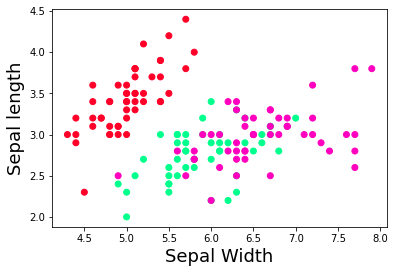

In [8]:
#Step 4: Let’s have a look at our data through a scatter plot.
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'

plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 1000000000, n_init = 10, random_state = 21)
y_kmeans = kmeans.fit_predict(x)

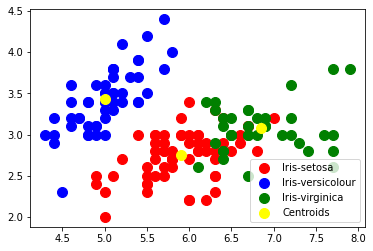

In [10]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [11]:
from fcmeans import FCM
fcm = FCM(n_clusters = 3, max_iter = 1000, random_state = 100)
fcm.fit(x)

In [12]:
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

In [13]:
fcm_centers

array([[6.77501005, 3.05238193, 5.64678032, 2.05354609],
       [5.00396596, 3.41408891, 1.48281545, 0.25354628],
       [5.88893139, 2.76106901, 4.36395022, 1.39731431]])

In [14]:
np.unique(fcm_labels)

array([0, 1, 2], dtype=int64)

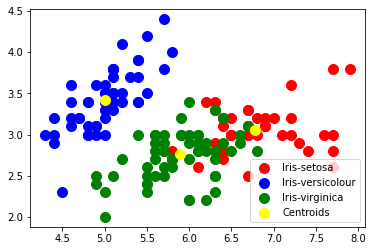

In [15]:
# Visualising the clusters - On the first two columns
plt.scatter(x[fcm_labels == 0, 0], x[fcm_labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[fcm_labels == 1, 0], x[fcm_labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[fcm_labels == 2, 0], x[fcm_labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(fcm_centers[:, 0], fcm_centers[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
